In [35]:
#importing packages
import pandas as pd
import numpy as np

In [36]:
# Importing the dataset
X = pd.read_csv('/content/NB.csv')
X['Fault'] = 0

y = pd.read_csv('/content/IR - 7.csv')
y['Fault'] = 1

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [38]:
train = pd.concat([X_train, y_train], axis=1)
train

,DE,FE,Fault,DE,FE,Fault
103476,0.062585,0.041091,0,-0.080568,-0.155118,1
96984,-0.075102,-0.013765,0,0.649091,-0.302429,1
114732,-0.048190,-0.001233,0,0.854734,0.199907,1
10916,0.069260,0.028558,0,0.107532,-0.167445,1
37646,0.040054,0.065335,0,0.518330,-0.097591,1
...,...,...,...,...,...,...
45891,0.060916,0.125738,0,0.110131,-0.312085,1
117952,-0.030249,0.072320,0,-0.909962,-0.030202,1
42613,-0.018150,-0.059376,0,0.676380,0.007396,1
43567,-0.180035,0.082387,0,0.011208,0.209975,1


In [39]:
test = pd.concat([X_test, y_test], axis=1)
test

,DE,FE,Fault,DE,FE,Fault
121079,0.046313,0.054651,0,-0.065299,-0.042735,1
107924,-0.015855,0.061636,0,0.029888,0.331809,1
22678,-0.065297,0.122862,0,-0.032325,-0.098002,1
55190,-0.112652,0.066978,0,0.193948,-0.030818,1
92048,0.023991,0.034105,0,0.267531,0.064307,1
...,...,...,...,...,...,...
103358,0.095546,-0.053829,0,0.019330,0.088962,1
54412,0.021696,0.148338,0,-0.072284,0.288664,1
50632,0.061542,0.059376,0,0.259571,-0.293184,1
89251,0.116407,-0.011505,0,0.010883,-0.042324,1


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [41]:
train = train.values.reshape(-1, 1, 3)

test  = test.values.reshape(-1, 1, 3)

In [42]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

In [43]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                4608      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 repeat_vector_1 (RepeatVec  (None, 1, 32)             0         
 tor)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 1, 32)             8320      
                                                                 
 dropout_3 (Dropout)         (None, 1, 32)             0         
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 3)              99        
 stributed)                                           

In [ ]:
# Train model for 100 epochs, batch size of 1000:
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train,
                  batch_size=BATCH_SIZE,
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Epoch 1/100
175/175 [==============================] - 6s 14ms/step - loss: 0.0452 - accuracy: 0.5510 - val_loss: 0.0048 - val_accuracy: 0.7214
Epoch 2/100
175/175 [==============================] - 2s 10ms/step - loss: 0.0064 - accuracy: 0.7012 - val_loss: 0.0014 - val_accuracy: 0.9770
Epoch 3/100
175/175 [==============================] - 2s 10ms/step - loss: 0.0042 - accuracy: 0.8408 - val_loss: 9.0980e-04 - val_accuracy: 0.9827
Epoch 4/100
175/175 [==============================] - 2s 9ms/step - loss: 0.0035 - accuracy: 0.8715 - val_loss: 6.5775e-04 - val_accuracy: 0.9875
Epoch 5/100
175/175 [==============================] - 2s 9ms/step - loss: 0.0031 - accuracy: 0.8848 - val_loss: 5.5522e-04 - val_accuracy: 0.9807
Epoch 6/100
175/175 [==============================] - 2s 11ms/step - loss: 0.0028 - accuracy: 0.8920 - val_loss: 4.6478e-04 - val_accuracy: 0.9803
Epoch 7/100
175/175 [==============================] - 3s 18ms/step - loss: 0.0025 - accuracy: 0.8952 - val_loss: 4.0788e-

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

In [ ]:
pred_train = model.predict(train)

In [ ]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

In [ ]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [ ]:
TH = 0.04
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [ ]:
scored_train['Loss_mae'].mean()

In [ ]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [ ]:
scored_train

In [ ]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

In [ ]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [ ]:
pred_test = model.predict(test)

1515/1515 [==============================] - 2s 2ms/step


In [ ]:
score = model.evaluate(test,test)
score

In [ ]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

In [ ]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [ ]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

In [ ]:
scored_test['Loss_mae'].mean()

Text(0, 0.5, 'Loss (MAE)')

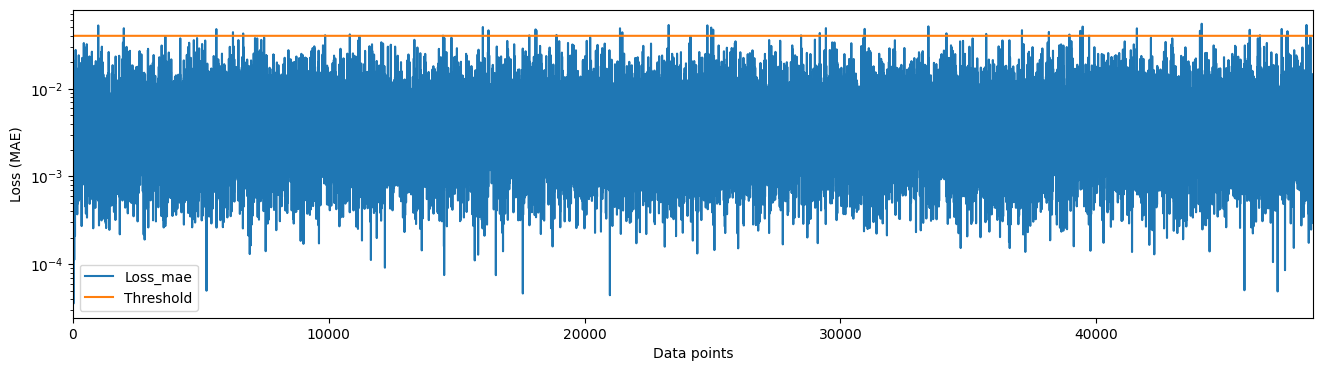

In [ ]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [ ]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
995    0.052493       0.04     True
1995   0.048792       0.04     True
5611   0.047726       0.04     True
6261   0.044025       0.04     True
6660   0.042562       0.04     True
9863   0.040647       0.04     True
10827  0.041535       0.04     True
14470  0.040186       0.04     True
16027  0.050386       0.04     True
16247  0.046186       0.04     True
16263  0.043591       0.04     True
17841  0.040486       0.04     True
18087  0.047332       0.04     True
18117  0.046189       0.04     True
18905  0.040918       0.04     True
21387  0.048742       0.04     True
21477  0.043869       0.04     True
23289  0.053137       0.04     True
24801  0.052608       0.04     True
24951  0.049654       0.04     True
25029  0.046985       0.04     True
28463  0.040470       0.04     True
29195  0.043076       0.04     True
29435  0.048951       0.04     True
30949  0.047975       0.04     True
33439  0.051253       0.04     True
34145  0.042688       0.04  

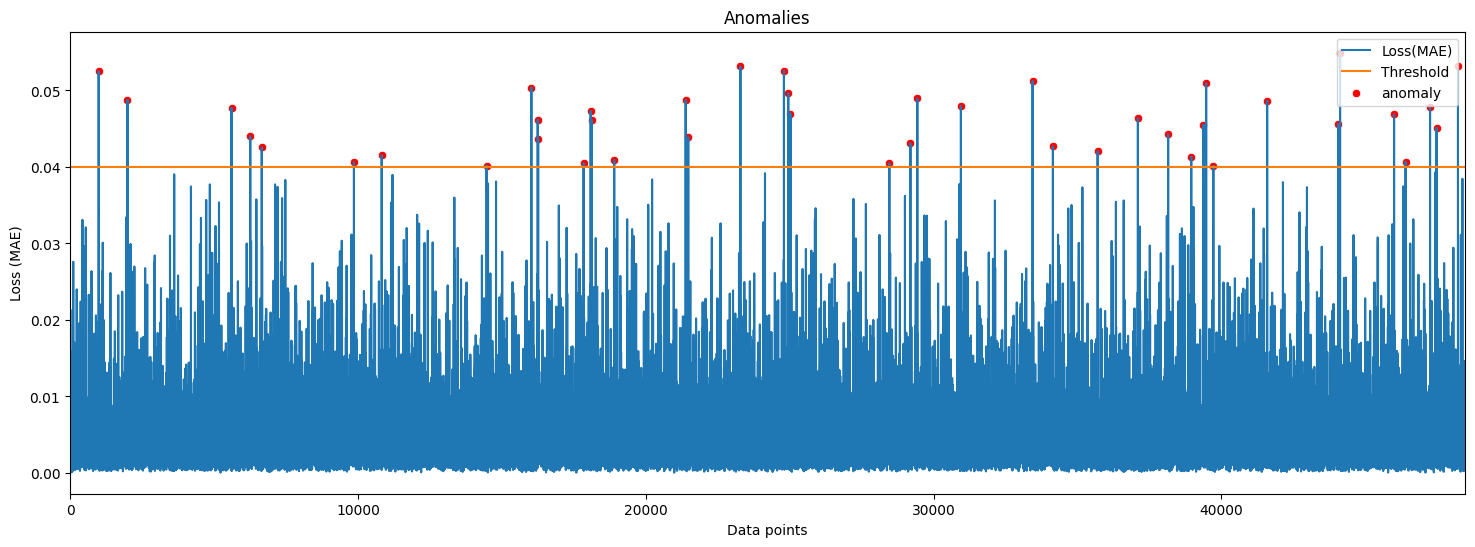

In [ ]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [ ]:
print(score[1])

0.9901778697967529


In [ ]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 99.02%


In [ ]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 42


In [ ]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [ ]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.002015,0.04,False
1,0.001098,0.04,False
2,0.001840,0.04,False
3,0.003754,0.04,False
4,0.002130,0.04,False
...,...,...,...
24226,0.004140,0.04,False
24227,0.004849,0.04,False
24228,0.008052,0.04,False
24229,0.003316,0.04,False


In [ ]:
IR_test = scored_test[scored_test.index >= x]
IR_test

,Loss_mae,Threshold,Anomaly
24231,0.000820,0.04,False
24232,0.010369,0.04,False
24233,0.000185,0.04,False
24234,0.003212,0.04,False
24235,0.001393,0.04,False
...,...,...,...
48457,0.003952,0.04,False
48458,0.003170,0.04,False
48459,0.003388,0.04,False
48460,0.002657,0.04,False


In [ ]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

FP = normal_test[normal_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

TN = IR_test[IR_test['Anomaly'] == True]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = IR_test[IR_test['Anomaly'] == False]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

True Positives: 24213
False Positives: 18
True Negatives: 24
False Negatives: 24207


In [ ]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Accuracy = ( TP + TN ) / ( TP + TN + FN + FP )
print("Accuracy: {:.2f}%".format(Accuracy*100))

Precision: 99.93%
Recall: 50.006%
F1 Score: 66.66%
Accuracy: 50.01%
